In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jigsaw-multilingual-toxic-comment-classification/sample_submission.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test_labels.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/validation-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/validation.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train-processed-seqlen128.csv


In [33]:
train = pd.read_csv('/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv')
validation = pd.read_csv('/kaggle/input/jigsaw-multilingual-toxic-comment-classification/validation.csv')
test = pd.read_csv('/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test.csv')

In [34]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [35]:
test.head()

,id,content,lang
0,0,Doctor Who adlı viki başlığına 12. doctor olar...,tr
1,1,"Вполне возможно, но я пока не вижу необходимо...",ru
2,2,"Quindi tu sei uno di quelli conservativi , ...",it
3,3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,tr
4,4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,tr


In [36]:
validation.head()

,id,comment_text,lang,toxic
0,0,Este usuario ni siquiera llega al rango de ...,es,0
1,1,Il testo di questa voce pare esser scopiazzato...,it,0
2,2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,es,1
3,3,Bu maddenin alt başlığı olarak uluslararası i...,tr,0
4,4,Belçika nın şehirlerinin yanında ilçe ve belde...,tr,0


In [37]:
# Check for missing values (if any)
print(train.isnull().sum())
print(test.isnull().sum())
print(validation.isnull().sum())
#no missing values

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
id         0
content    0
lang       0
dtype: int64
id              0
comment_text    0
lang            0
toxic           0
dtype: int64


In [38]:
train.drop(['severe_toxic','obscene','threat','insult','identity_hate'],axis=1,inplace=True)

In [39]:
train.head()

,id,comment_text,toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0


In [40]:
import re
import nltk
from nltk.corpus import stopwords  # <-- Import this
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))  # Now this will work
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Ensures compatibility

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [42]:
import nltk
print(nltk.data.path)


['/root/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/kaggle/working/']


In [43]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
#DATA PREPROCESSING

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\n', ' ', text)  # Remove new lines
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # Lemmatization & stopword removal
    return text

# Apply preprocessing
train["clean_text"] = train["comment_text"].apply(clean_text)
validation["clean_text"] = validation["comment_text"].apply(clean_text)
test["clean_text"] = test["content"].apply(clean_text)

print(train["clean_text"].head())


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
0    explanation edits made username hardcore metal...
1    aww match background colour seemingly stuck th...
2    hey man really trying edit war guy constantly ...
3    make real suggestion improvement wondered sect...
4                        sir hero chance remember page
Name: clean_text, dtype: object


In [45]:
train.head()

,id,comment_text,toxic,clean_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,aww match background colour seemingly stuck th...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,make real suggestion improvement wondered sect...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,sir hero chance remember page


In [46]:
test.head()

,id,content,lang,clean_text
0,0,Doctor Who adlı viki başlığına 12. doctor olar...,tr,doctor adlı viki başlığına 12 doctor olarak bi...
1,1,"Вполне возможно, но я пока не вижу необходимо...",ru,вполне возможно но я пока не вижу необходимост...
2,2,"Quindi tu sei uno di quelli conservativi , ...",it,quindi tu sei uno di quelli conservativi che p...
3,3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,tr,malesef gerçekleştirilmedi ancak şöyle bir şey...
4,4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,tr,resim seldabagcan jpg resminde kaynak sorunu r...


In [47]:
validation.head()

,id,comment_text,lang,toxic,clean_text
0,0,Este usuario ni siquiera llega al rango de ...,es,0,este usuario ni siquiera llega al rango de her...
1,1,Il testo di questa voce pare esser scopiazzato...,it,0,il testo di questa voce pare esser scopiazzato...
2,2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,es,1,vale sólo expongo mi pasado todo tiempo pasado...
3,3,Bu maddenin alt başlığı olarak uluslararası i...,tr,0,bu maddenin alt başlığı olarak uluslararası il...
4,4,Belçika nın şehirlerinin yanında ilçe ve belde...,tr,0,belçika nın şehirlerinin yanında ilçe beldeler...


In [48]:
# Convert text to TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Use top 5000 words

X_train_tfidf = tfidf.fit_transform(train["clean_text"])
X_valid_tfidf = tfidf.transform(validation["clean_text"])
X_test_tfidf = tfidf.transform(test["clean_text"])

# Labels (target variable)
y_train = train["toxic"]
y_valid = validation["toxic"]


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [50]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on validation set
y_pred = model.predict(X_valid_tfidf)

# Evaluate model performance
print(f"Accuracy: {accuracy_score(y_valid, y_pred):.4f}")
print(classification_report(y_valid, y_pred))


Accuracy: 0.8480
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6770
           1       0.85      0.01      0.03      1230

    accuracy                           0.85      8000
   macro avg       0.85      0.51      0.47      8000
weighted avg       0.85      0.85      0.78      8000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
print(train["toxic"].value_counts())

#since the toxic column is imbalanced we are using over sampling method to balance the column

toxic
0    202165
1     21384
Name: count, dtype: int64


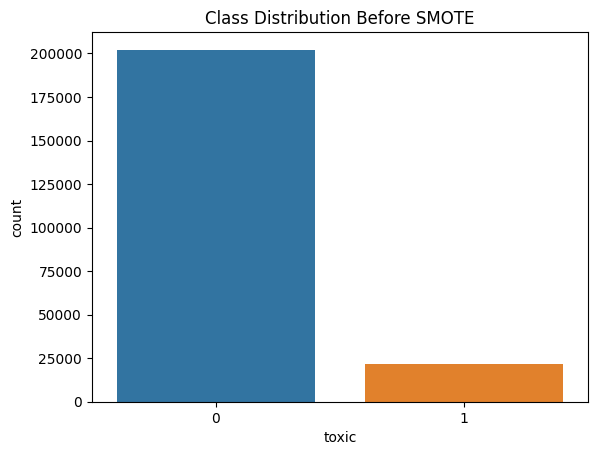

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of samples per class
sns.countplot(x=train["toxic"])
plt.title("Class Distribution Before SMOTE")
plt.show()


In [53]:
#Training the Word2Vec Model

from gensim.models import Word2Vec

# Train the Word2Vec model
model = Word2Vec(sentences=train['clean_text'], vector_size=100, window=5, min_count=1, workers=4)

# Save the model for later use
model.save("word2vec_model.model")

# Load the model if needed
# model = Word2Vec.load("word2vec_model.model")


* Train the Word2Vec model only on the training data.
* Use the trained model to generate embeddings for the validation and test datasets (without retraining the embeddings on them).

In [ ]:
import numpy as np

# Function to get the average word embedding for a sentence
def get_average_word_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Convert your tokenized sentences into vectors
X_train_vectors = np.array([get_average_word_vector(tokens, model) for tokens in train['clean_text']])
X_valid_vectors = np.array([get_average_word_vector(tokens, model) for tokens in validation['clean_text']])
X_test_vectors = np.array([get_average_word_vector(tokens, model) for tokens in test['clean_text']])

# Now X_train_vectors, X_valid_vectors, and X_test_vectors can be used for model training


In [55]:
# Handling imbalanced toxic column in the train dataset

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to balance the training set
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_vectors, train['toxic'])

# Check the class distribution after balancing
print(f"Class distribution in balanced training set: {np.bincount(y_train_balanced)}")

Class distribution in balanced training set: [202165 202165]


**Training the Model**

In [56]:
X_train = X_train_balanced
y_train = y_train_balanced

In [57]:
# Validation Data (No SMOTE)
X_valid = np.array(X_valid_vectors)  
y_valid = validation['toxic'].values  # Use actual labels

# Test Data (No Labels)
X_test = np.array(X_test_vectors)

**Random Forest Classifier**

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Optimized Random Forest
model = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)  # Faster training

# Evaluate on Validation Set
y_valid_pred = model.predict(X_valid)
print(f"Validation Accuracy: {accuracy_score(y_valid, y_valid_pred)}")

# Predict on Test Set
# = model.predict(X_test)


Validation Accuracy: 0.841875


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Example using Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Predict on validation set
y_pred = model_lr.predict(X_valid)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_valid, y_valid_pred):.4f}")
print(classification_report(y_valid, y_pred))


Accuracy: 0.8419
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      6770
           1       0.22      0.21      0.21      1230

    accuracy                           0.76      8000
   macro avg       0.54      0.54      0.54      8000
weighted avg       0.76      0.76      0.76      8000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Deep Learning Models**

In [61]:
# A basic neural network

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_valid, y_valid))

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_valid, y_valid)
print(f"Validation Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6318/6318 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6697 - loss: 0.6043 - val_accuracy: 0.6780 - val_loss: 0.5955
Epoch 2/10
6318/6318 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.6926 - loss: 0.5762 - val_accuracy: 0.8074 - val_loss: 0.5465
Epoch 3/10
6318/6318 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7003 - loss: 0.5672 - val_accuracy: 0.8292 - val_loss: 0.5177
Epoch 4/10
6318/6318 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7024 - loss: 0.5637 - val_accuracy: 0.8357 - val_loss: 0.4759
Epoch 5/10
6318/6318 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7026 - loss: 0.5613 - val_accuracy: 0.8282 - val_loss: 0.5144
Epoch 6/10
6318/6318 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7082 - loss: 0.5560 - val_accuracy: 0.8385 - val_loss: 0.4990
Epoch 7/10
6318/6318 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7089 - loss: 0.5562 - val_accuracy: 0.8274 - val_loss: 0.5319
Epoch 8/10
6318/6318 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7118 - loss: 0

In [63]:
# A simple RNN model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Assuming X_train, X_valid, X_test are already word2vec vectors
# Define the shape of input
embedding_dim = X_train.shape[1]  # Use the dimension of your Word2Vec embeddings

# Define RNN Model
rnn_model = Sequential([
    tf.keras.layers.Input(shape=(embedding_dim,)),  # Directly take word2vec vectors
    tf.keras.layers.Reshape((1, embedding_dim)),  # Reshape for RNN input
    SimpleRNN(128, return_sequences=False),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile Model
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
rnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_valid, y_valid))

# Evaluate on Test Data
y_test_pred_rnn = rnn_model.predict(X_test)
y_test_pred_rnn = (y_test_pred_rnn > 0.5).astype(int)

rnn_acc = rnn_model.evaluate(X_valid, y_valid)[1]
print(f"RNN Validation Accuracy: {rnn_acc:.2f}")

Epoch 1/10
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8965 - loss: 0.3401 - val_accuracy: 0.8462 - val_loss: 0.4897
Epoch 2/10
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9039 - loss: 0.3099 - val_accuracy: 0.8462 - val_loss: 0.4665
Epoch 3/10
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9043 - loss: 0.3087 - val_accuracy: 0.8462 - val_loss: 0.4699
Epoch 4/10
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9052 - loss: 0.3065 - val_accuracy: 0.8462 - val_loss: 0.4748
Epoch 5/10
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9036 - loss: 0.3106 - val_accuracy: 0.8462 - val_loss: 0.4692
Epoch 6/10
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9038 - loss: 0.3101 - val_accuracy: 0.8462 - val_loss: 0.4999
Epoch 7/10
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9041 - loss: 0.3093 - val_accuracy: 0.8462 - val_loss: 0.4925
Epoch 8/10
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9047 - loss: 0.3080 -

In [64]:
# A simple LSTM

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define LSTM Model
lstm_model = Sequential([
    tf.keras.layers.Input(shape=(embedding_dim,)),  # Take word2vec vectors as input
    tf.keras.layers.Reshape((1, embedding_dim)),  # Reshape for LSTM input
    LSTM(128, return_sequences=False),
    Dense(1, activation='sigmoid')
])

# Compile Model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_valid, y_valid))

# Evaluate on Test Data
y_test_pred_lstm = lstm_model.predict(X_test)
y_test_pred_lstm = (y_test_pred_lstm > 0.5).astype(int)

lstm_acc = lstm_model.evaluate(X_valid, y_valid)[1]
print(f"LSTM Accuracy: {lstm_acc:.2f}")

Epoch 1/10
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8949 - loss: 0.3334 - val_accuracy: 0.8462 - val_loss: 0.4801
Epoch 2/10
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9056 - loss: 0.3064 - val_accuracy: 0.8462 - val_loss: 0.4925
Epoch 3/10
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9039 - loss: 0.3090 - val_accuracy: 0.8462 - val_loss: 0.4862
Epoch 4/10
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9040 - loss: 0.3083 - val_accuracy: 0.8462 - val_loss: 0.4837
Epoch 5/10
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9030 - loss: 0.3111 - val_accuracy: 0.8462 - val_loss: 0.4825
Epoch 6/10
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9036 - loss: 0.3102 - val_accuracy: 0.8462 - val_loss: 0.4811
Epoch 7/10
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9046 - loss: 0.3079 - val_accuracy: 0.8462 - val_loss: 0.4887
Epoch 8/10
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9038 - loss: 0